In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(threshold=np.inf)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score


import scipy as sp
np.set_printoptions(threshold=np.inf)

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
# # 读取数据
# dataset= pd.read_excel('data6041.xlsx', sheet_name='Sheet1')
# X = dataset.iloc[:, 1:4]
# y = dataset.iloc[:,4]




In [3]:
# #分测试集和训练集
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # 特征归一化
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)



In [4]:
# df=dataset.iloc[:,1:5]
# df_train,df_test=train_test_split(df,test_size = 0.2, random_state = 0)
# df_train.to_csv("d://xunlian.csv")
# df_test.to_csv("d://ceshi.csv")

In [2]:

print("开始读入训练数据...")
df = pd.read_excel('../data/train6041.xlsx', sheet_name='Sheet1')


esc = StandardScaler().fit(df['Fluid resistivity logging'].values.reshape(-1, 1))
fsc = StandardScaler().fit(df['natural gamma-ray logging'].values.reshape(-1, 1))
gsc = StandardScaler().fit(df['spontaneous potential logging'].values.reshape(-1, 1))




e = esc.transform(df['Fluid resistivity logging'].values.reshape(-1, 1))
f = fsc.transform(df['natural gamma-ray logging'].values.reshape(-1, 1))
g = gsc.transform(df['spontaneous potential logging'].values.reshape(-1, 1))



X_train = np.concatenate(( e,f,g), axis=1)
y_train = np.array(df['rock'])



开始读入训练数据...


In [6]:
#生成分类器并训练
from sklearn.svm import SVC

classifier= SVC( random_state=0)



In [7]:
# #应用k次交叉验证评价模型性能
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# accuracies.mean()
# #accuracies.std() 
# #这意味着我们的准确度在（90-100）%之间

In [8]:
#应用网格搜索寻找最佳模型和最佳参数
from sklearn.model_selection import GridSearchCV #对SVC进行检查，网格搜索优化参数。
parameters = [{'C' : [10,100.0,1000,10000],'gamma' : [0.01,0.1,1,10,100]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [9]:
#将网格搜索对象拟合到训练集
# grid_search = grid_search.fit(X_train, y_train)

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


28.105261799999997


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


In [10]:
#最优精度
best_accuracy = grid_search.best_score_
#最优参数
best_parameters = grid_search.best_params_






In [11]:
print('%.5f' %best_accuracy)
print(best_parameters)


0.73263
{'C': 10000, 'gamma': 0.1}


In [12]:
parameters = [{'C' : np.linspace (1000, 15000, 6),'gamma' : np.linspace (0.05, 0.55, 6)}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [13]:
# grid_search = grid_search.fit(X_train, y_train)
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


145.29995229999997


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [14]:
#最优精度
best_accuracy = grid_search.best_score_
#最优参数
best_parameters = grid_search.best_params_

In [15]:
print('%.5f' %best_accuracy)
print(best_parameters)

0.74413
{'C': 3800.0, 'gamma': 0.25}


In [16]:
parameters = [{'C' : np.linspace (1000, 15000, 6),'gamma' :[0.25]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [17]:

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


28.69449229999998


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [18]:
k1 = [1000,3800,6600,9400,12200,15000]
for x1 in k1:
    classifier= SVC(C=x1,gamma=0.25,random_state=0)
    classifier.fit(X_train, y_train,)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 )
   

    print('%.5f' % accuracies.mean())


0.73522
0.74425
0.74280
0.74333
0.74377
0.74332


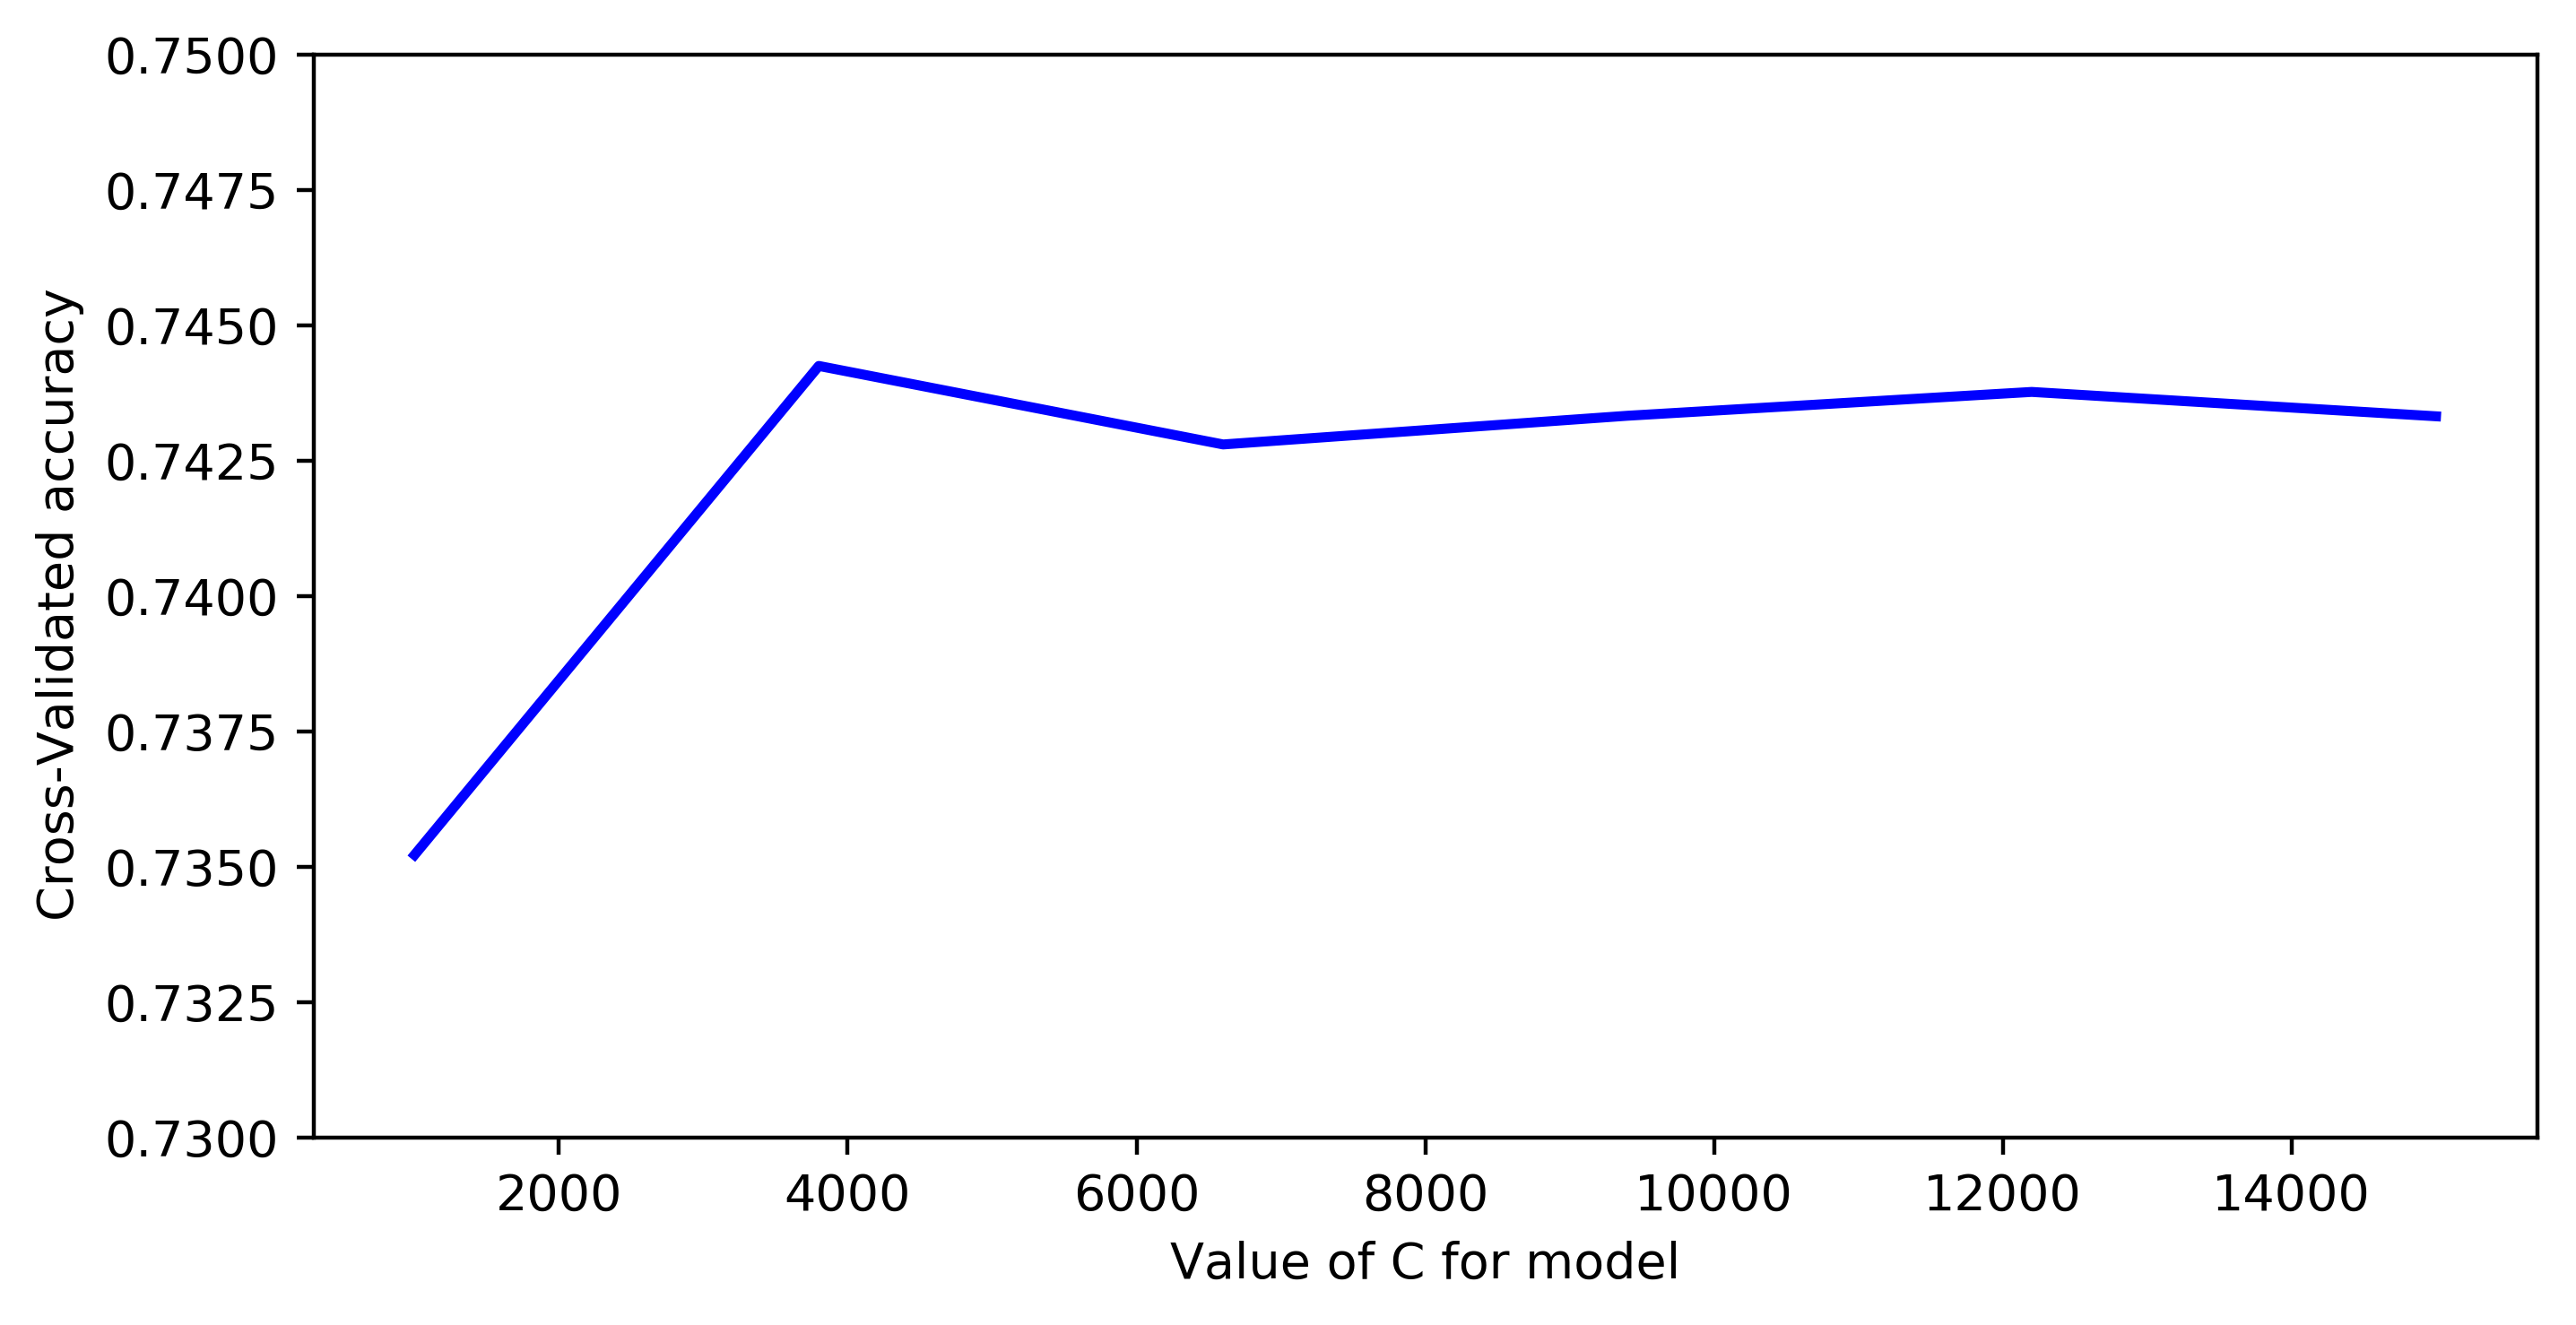

In [19]:
x = [1000,3800,6600,9400,12200,15000]
y=[0.73522,0.74425,0.74280,0.74333,0.74377,0.74332]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of C for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.73,0.75)
plt.show
plt.savefig('../Data/SVM_accuracy_1.png', format='png')

In [20]:
parameters = [{'C' : [3800],'gamma' :np.linspace (0.05, 0.55, 6)}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [21]:

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


18.759885800000006


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [22]:
k2 = [0.05,0.15,0.25,0.35,0.45,0.55]
for x2 in k2:
    classifier= SVC(C=3800,gamma=x2,random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.71181
0.73473
0.74425
0.74144
0.73663
0.73364


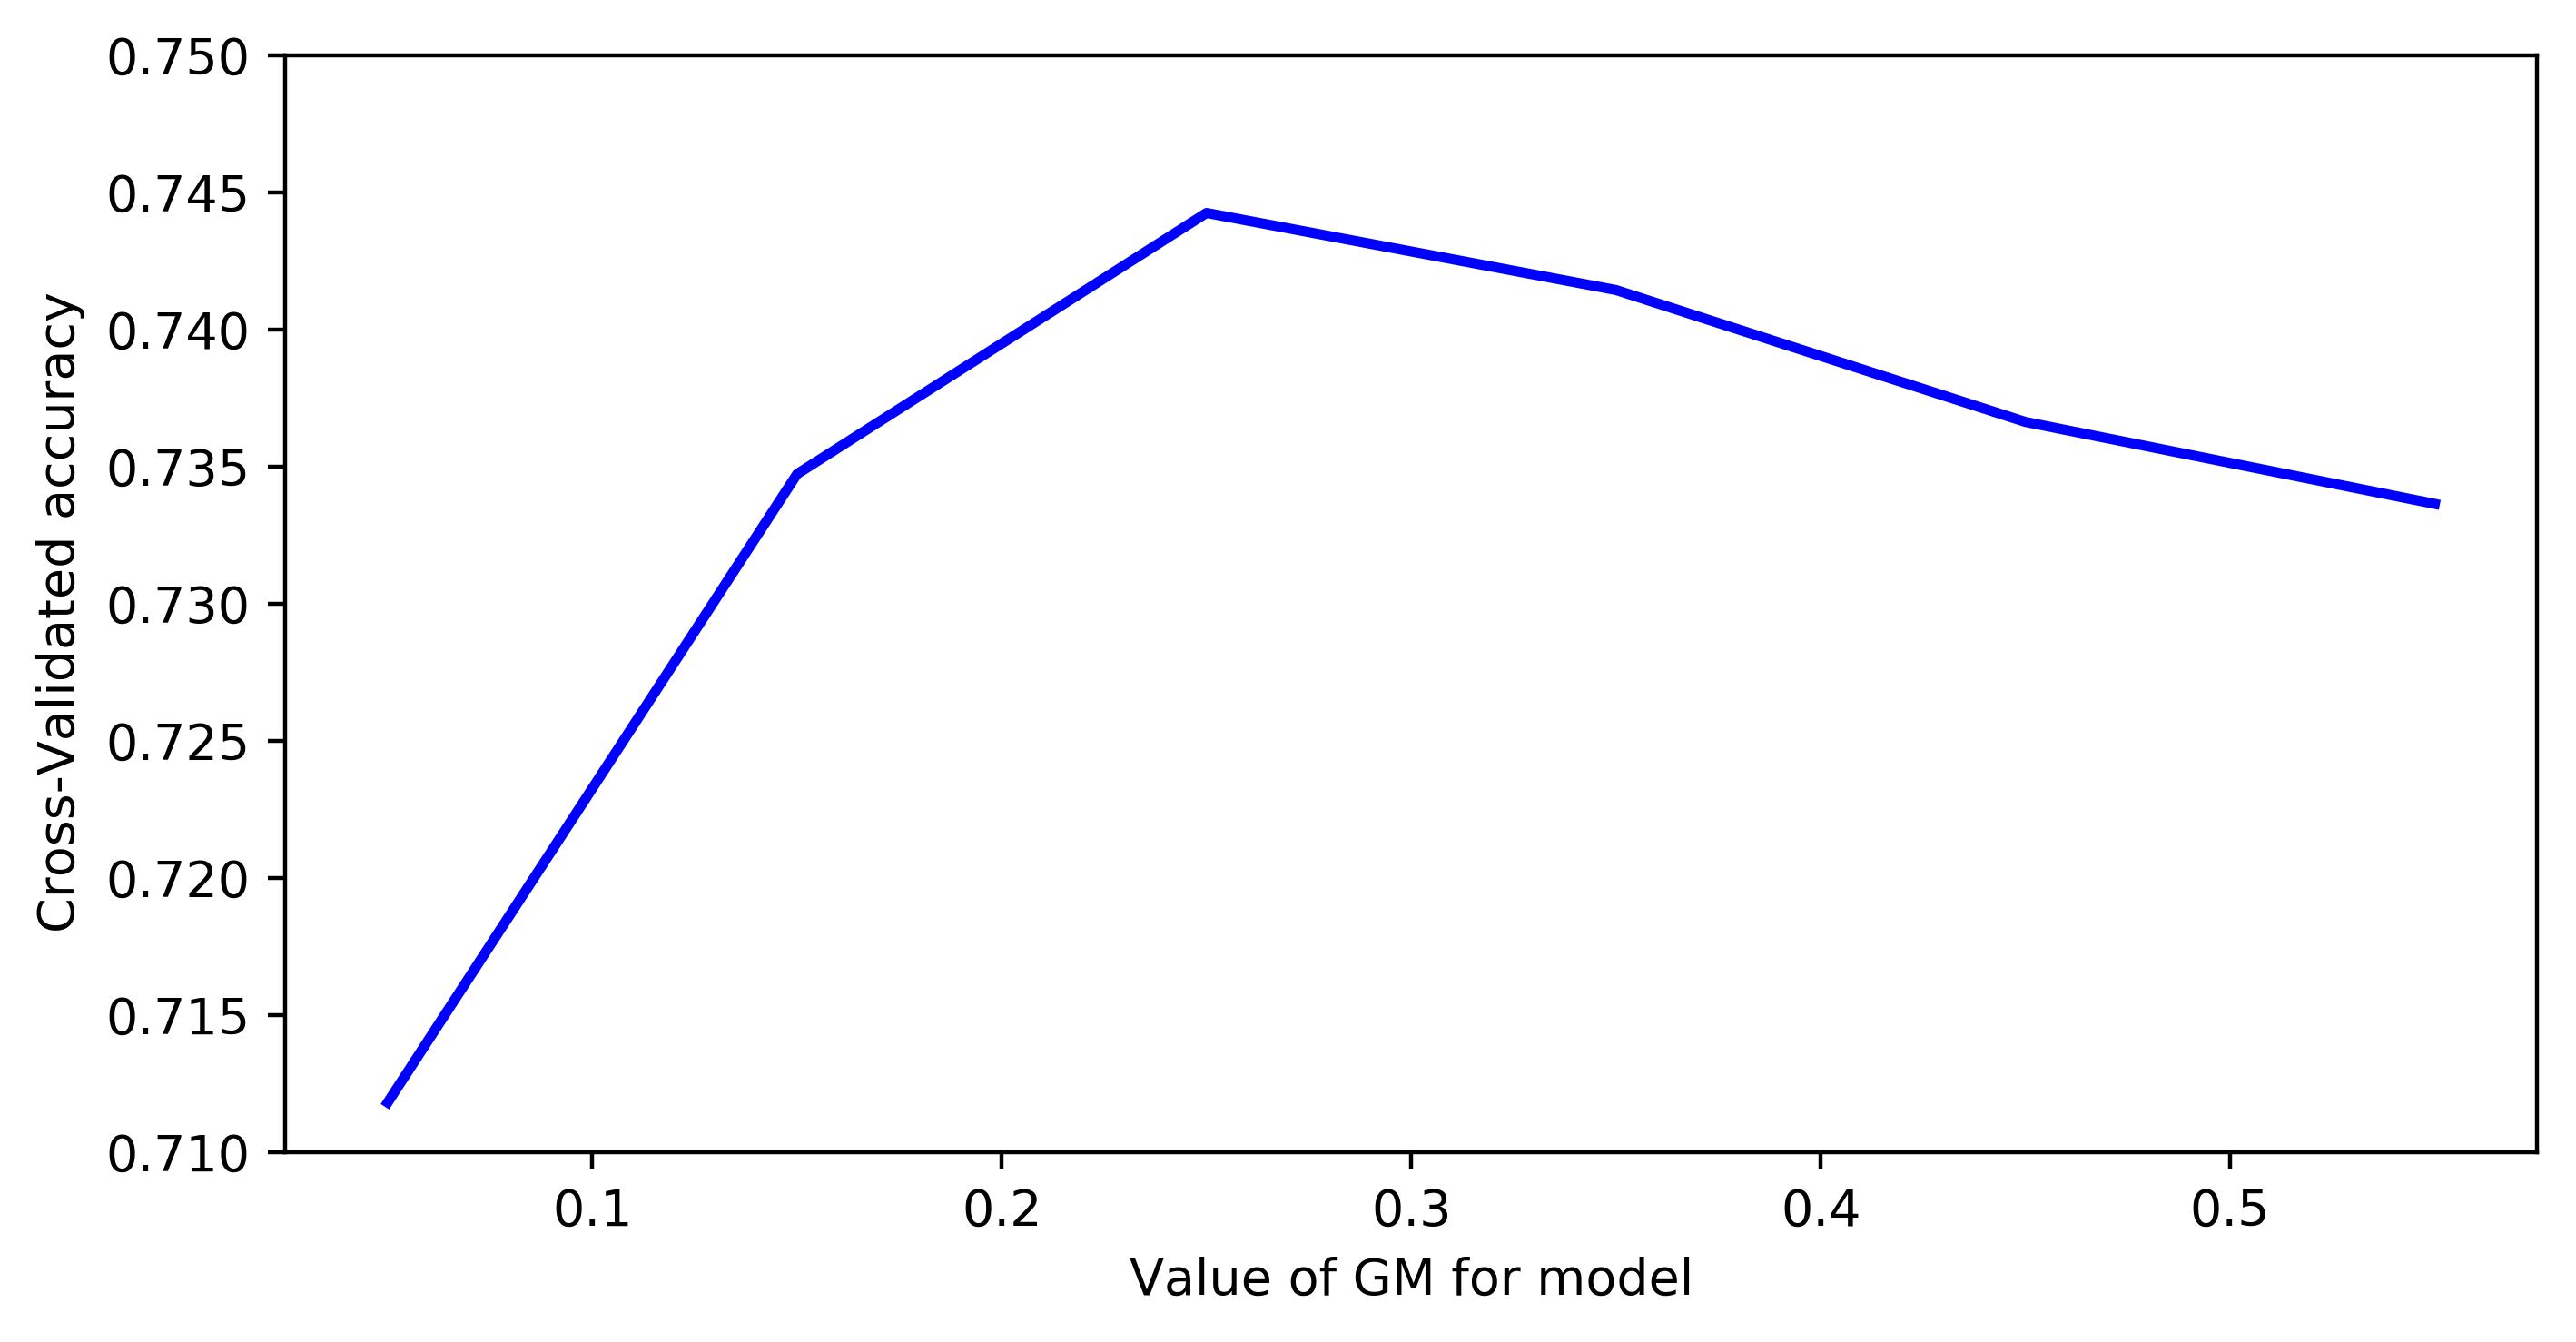

In [23]:
x = [0.05,0.15,0.25,0.35,0.45,0.55]
y=[0.71181,0.73473,0.74425,0.74144,0.73663,0.73364]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of GM for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.71,0.75)
plt.show
plt.savefig('../Data/SVM_accuracy_2.png', format='png')

In [24]:
parameters = [{'C' : np.linspace (3600, 4500, 6),'gamma' : np.linspace (0.2, 0.3, 6)}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [25]:
# grid_search = grid_search.fit(X_train, y_train)
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


97.62550279999994


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [26]:
#最优精度
best_accuracy = grid_search.best_score_
#最优参数。
best_parameters = grid_search.best_params_



In [27]:
print('%.5f' %best_accuracy)
print(best_parameters)

0.74509
{'C': 3960.0, 'gamma': 0.24}


In [28]:
parameters = [{'C' :np.linspace (3600, 4500, 6),'gamma' : [0.24]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [29]:
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


18.76526080000008


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [30]:
k3 = [3600,3780,3960,4140,4320,4500]
for x3 in k3:
    classifier= SVC(C=x3,gamma=0.24)
    classifier.fit(X_train, y_train,)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
   

    print('%.5f' % accuracies.mean())

0.74332
0.74474
0.74521
0.74473
0.74376
0.74472


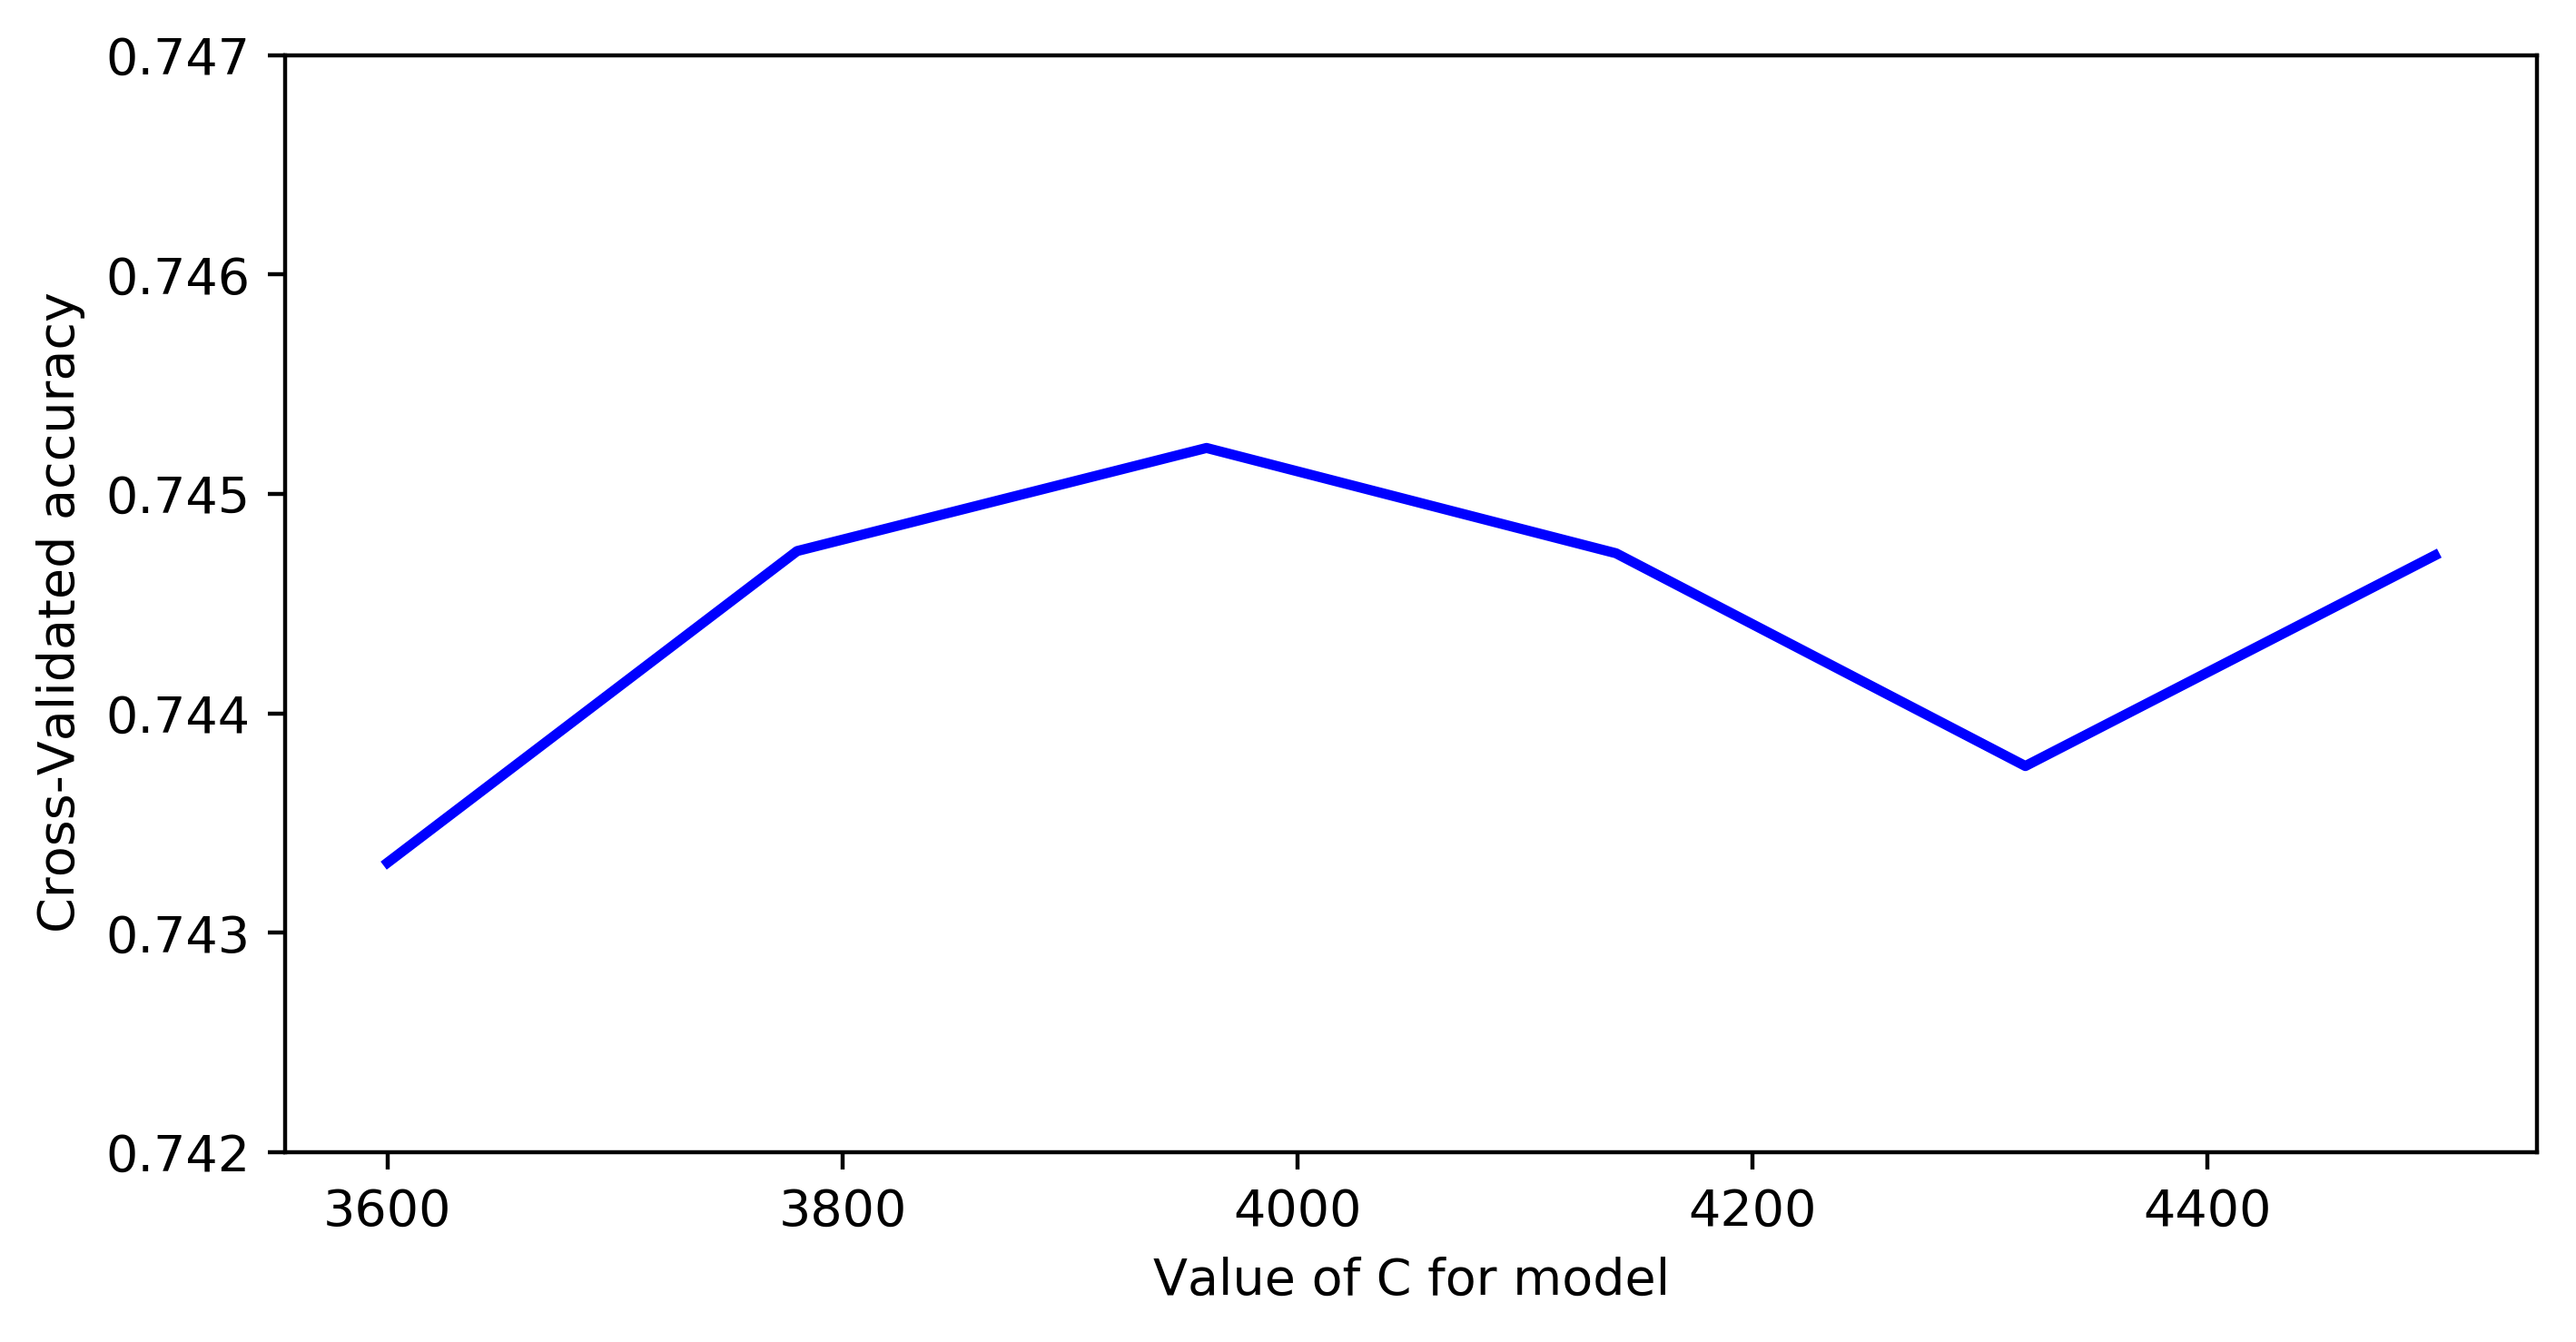

In [31]:
x = [3600,3780,3960,4140,4320,4500]
y=[0.74332,0.74474,0.74521,0.74473,0.74376,0.74472]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of C for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.742,0.747)
plt.show
plt.savefig('../Data/SVM_accuracy_3.png', format='png')

In [32]:
parameters = [{'C' : [3960],'gamma' :  np.linspace (0.2, 0.3, 6)}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [33]:
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


19.272680100000002


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [34]:
k4 = [0.2,0.22,0.24,0.26,0.28,0.3]
for x4 in k4:
    classifier= SVC(C=3960,gamma=x4,random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.73852
0.74140
0.74521
0.74376
0.74187
0.74284


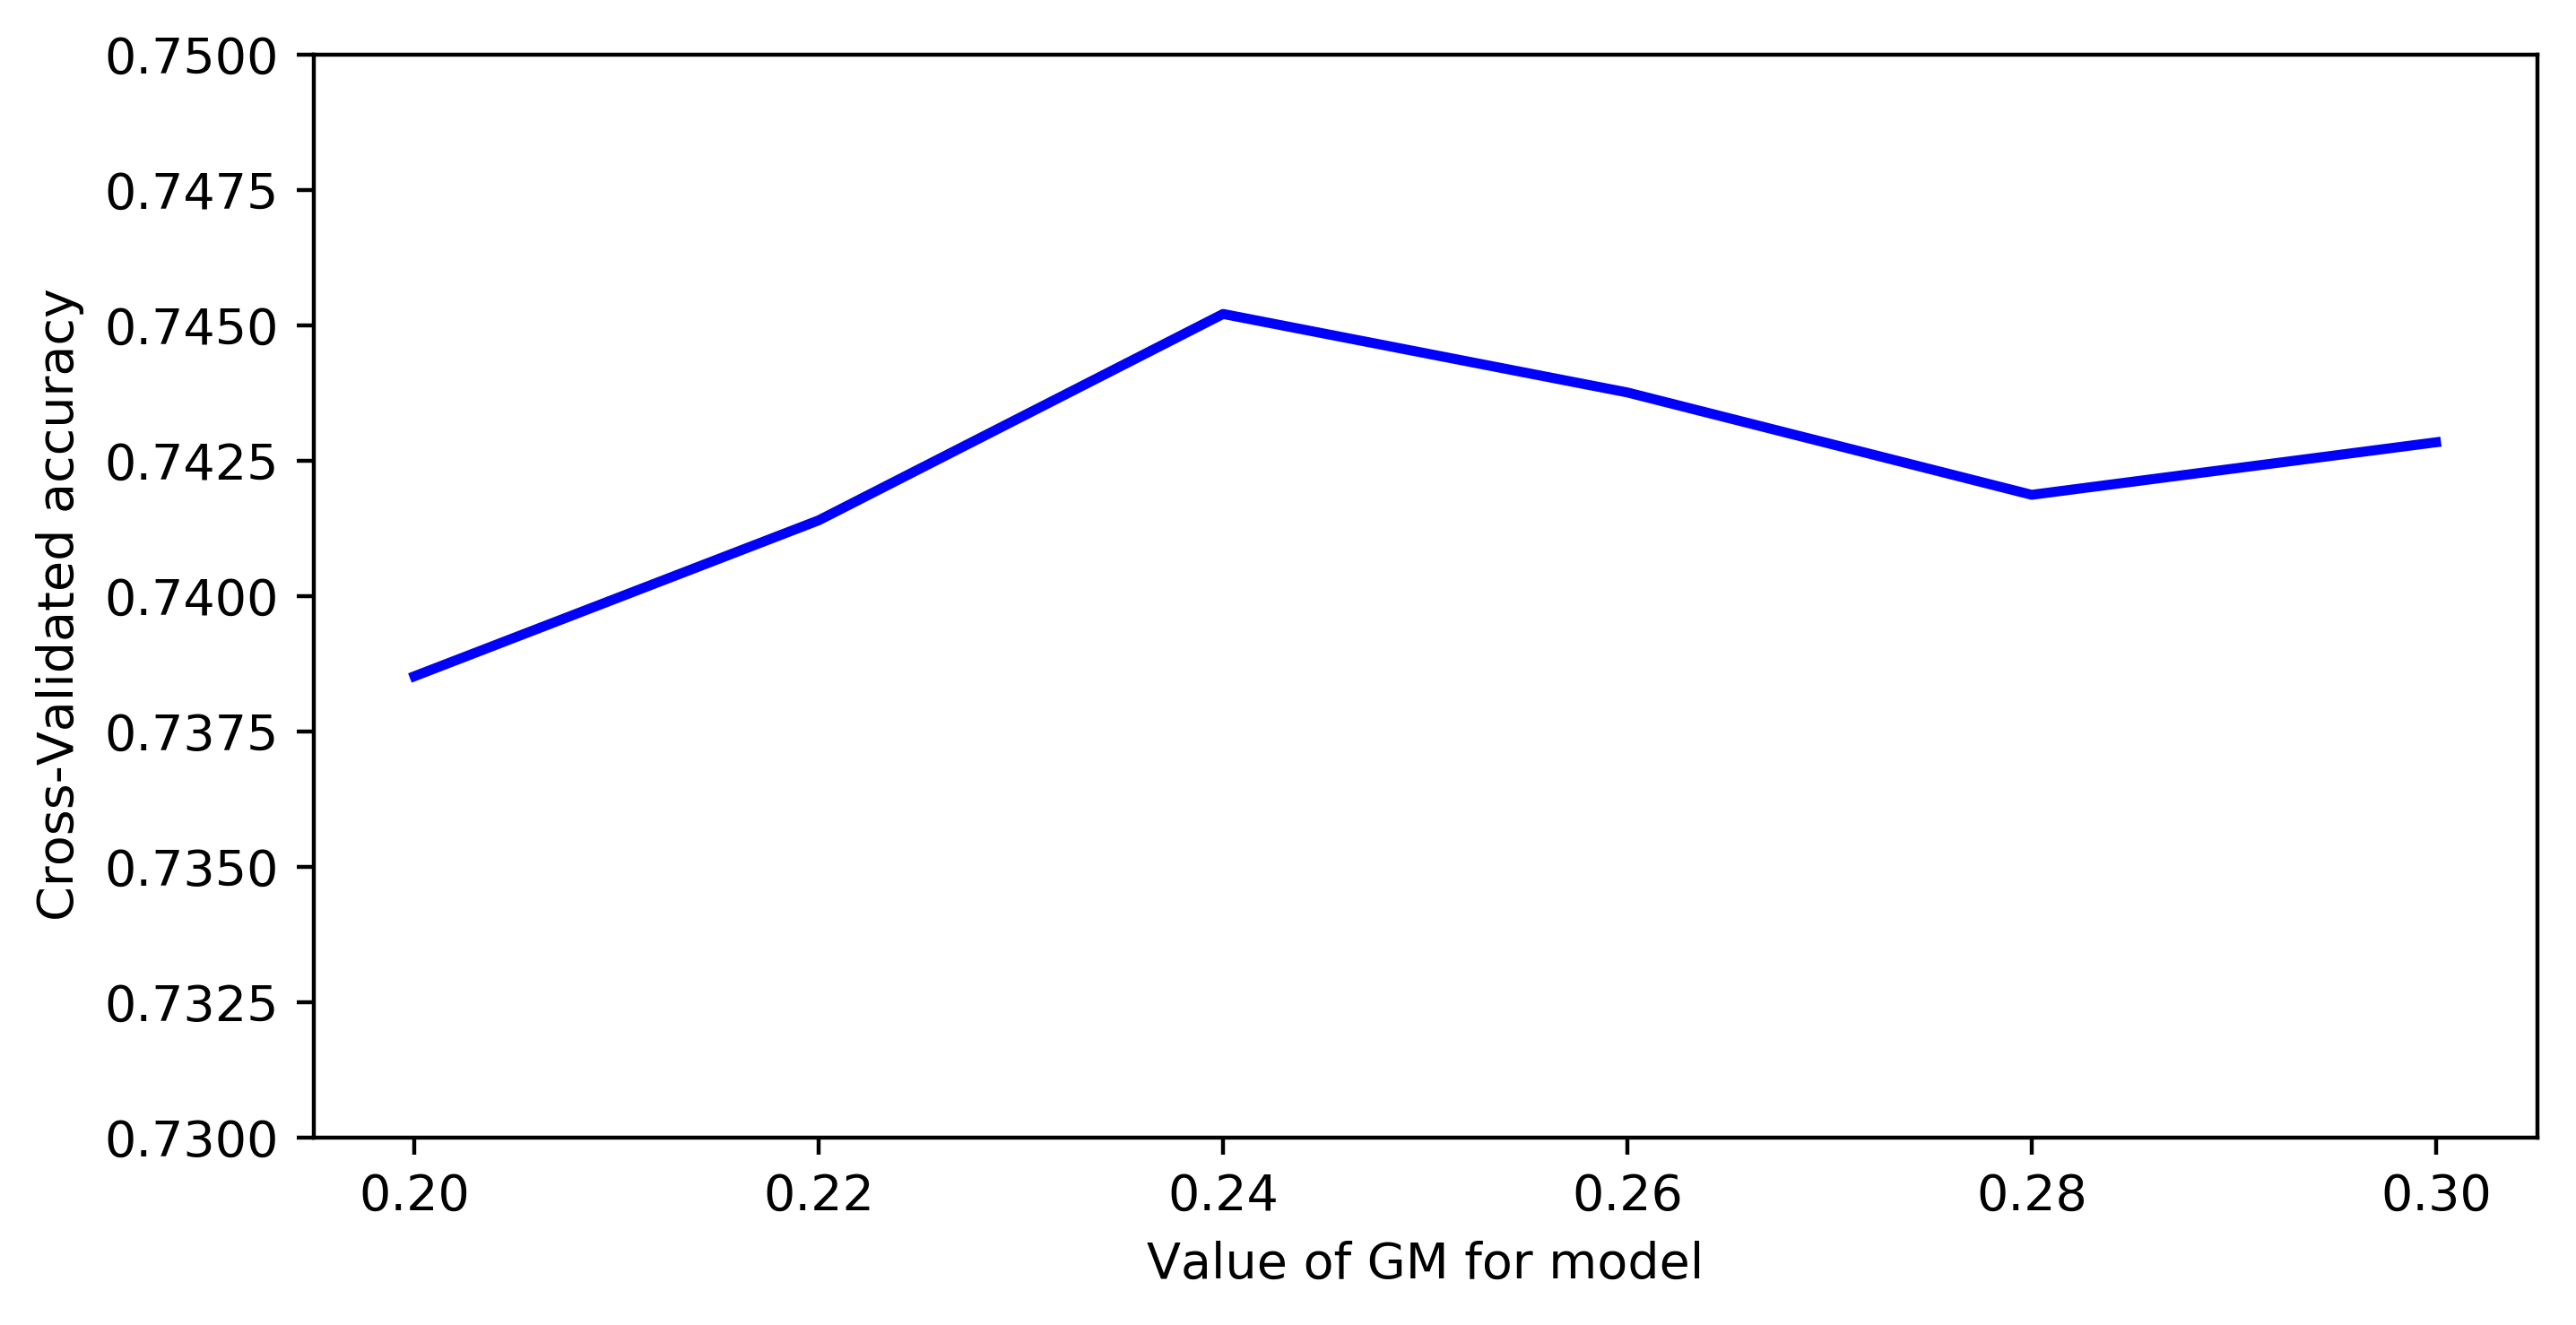

In [35]:
x = [0.2,0.22,0.24,0.26,0.28,0.3]
y=[0.73852,0.74140,0.74521,0.74376,0.74187,0.74284]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of GM for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.73,0.75)
plt.show
plt.savefig('../Data/SVM_accuracy_4.png', format='png')

In [3]:

from sklearn.model_selection import cross_val_score
classifier= SVC(C=3960,gamma=0.24,random_state=0)
classifier.fit(X_train, y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train,cv=10 )
# print('训练集精度为：')

# print('%.5f' %accuracies.mean())




In [4]:
print("正在保存训练数据结果至文件中...")
y_train_pred= classifier.predict(X_train)
y_train_pred = pd.DataFrame({'SVM_train_pred': y_train_pred})
Df = pd.concat([df, y_train_pred ], axis=1)
writer = pd.ExcelWriter('../data/train6041.xlsx', engine='xlsxwriter')

Df.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()
print("处理完毕，已保存至文件！")
input("Please press <enter>")

print('训练集精度为：')

accuracy_score(y_train,y_train_pred)


正在保存训练数据结果至文件中...
处理完毕，已保存至文件！
Please press <enter>
训练集精度为：


0.7700047915668423

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred,digits=5))


              precision    recall  f1-score   support

           1    1.00000   0.94030   0.96923        67
           2    0.94737   0.51429   0.66667       140
           3    0.86994   0.97608   0.91995       836
           4    0.64605   0.82456   0.72447       456
           5    0.87500   0.29167   0.43750        24
           6    0.55484   0.48588   0.51807       177
           7    0.64706   0.50926   0.56995       108
           8    0.61111   0.27731   0.38150       119
           9    0.88710   0.88710   0.88710        62
          10    0.68750   0.44898   0.54321        98

    accuracy                        0.77000      2087
   macro avg    0.77260   0.61554   0.66177      2087
weighted avg    0.76937   0.77000   0.75472      2087



In [38]:
print("开始读入测试数据...")
testDf = pd.read_excel('../data/test6041.xlsx', sheet_name='Sheet1')


# ttc = csc.transform(testDf[' temperature logging'].values.reshape(-1, 1))
# ttd = dsc.transform(testDf['Vertical Component Logging '].values.reshape(-1, 1))
tte = esc.transform(testDf['Fluid resistivity logging'].values.reshape(-1, 1))
ttf = fsc.transform(testDf['natural gamma-ray logging'].values.reshape(-1, 1))
ttg = gsc.transform(testDf['spontaneous potential logging'].values.reshape(-1, 1))


X_test = np.concatenate((tte,ttf,ttg), axis=1)

y_test = np.array(testDf['rock'])

开始读入测试数据...


In [39]:
classifier.fit(X_test, y_test)
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test,cv=10)
# print('测试集精度为：')

# print('%.5f' %accuracies.mean())

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [40]:
# y_test_pred = classifier.predict(X_test)
y_test_pred= classifier.predict(X_test)
print("正在保存测试结果至文件中...")
y_test_pred = pd.DataFrame({'SVM_test_pred':y_test_pred })
wDf = pd.concat([testDf, y_test_pred ], axis=1)
writer = pd.ExcelWriter('../data/test6041.xlsx', engine='xlsxwriter')

wDf.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()
print("处理完毕，已保存至文件！")
input("Please press <enter>")
print('测试集精度为：')

accuracy_score(y_test,y_test_pred)

正在保存测试结果至文件中...
处理完毕，已保存至文件！
Please press <enter>
测试集精度为：


0.7624521072796935

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred,digits=5))



              precision    recall  f1-score   support

           1    1.00000   1.00000   1.00000        16
           2    0.94118   0.48485   0.64000        33
           3    0.86325   0.96651   0.91196       209
           4    0.59740   0.80702   0.68657       114
           5    1.00000   0.33333   0.50000         3
           6    0.61538   0.40000   0.48485        40
           7    0.60870   0.43750   0.50909        32
           8    0.83333   0.33333   0.47619        30
           9    0.89474   0.94444   0.91892        18
          10    0.70000   0.51852   0.59574        27

   micro avg    0.76245   0.76245   0.76245       522
   macro avg    0.80540   0.62255   0.67233       522
weighted avg    0.77142   0.76245   0.74729       522



[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.485 0.515 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.967 0.019 0.    0.    0.014 0.    0.    0.   ]
 [0.    0.    0.053 0.807 0.    0.061 0.035 0.009 0.009 0.026]
 [0.    0.333 0.333 0.    0.333 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.6   0.    0.4   0.    0.    0.    0.   ]
 [0.    0.    0.25  0.281 0.    0.    0.438 0.    0.    0.031]
 [0.    0.    0.    0.5   0.    0.1   0.    0.333 0.    0.067]
 [0.    0.    0.    0.    0.    0.    0.    0.056 0.944 0.   ]
 [0.    0.    0.    0.37  0.    0.    0.074 0.    0.037 0.519]]


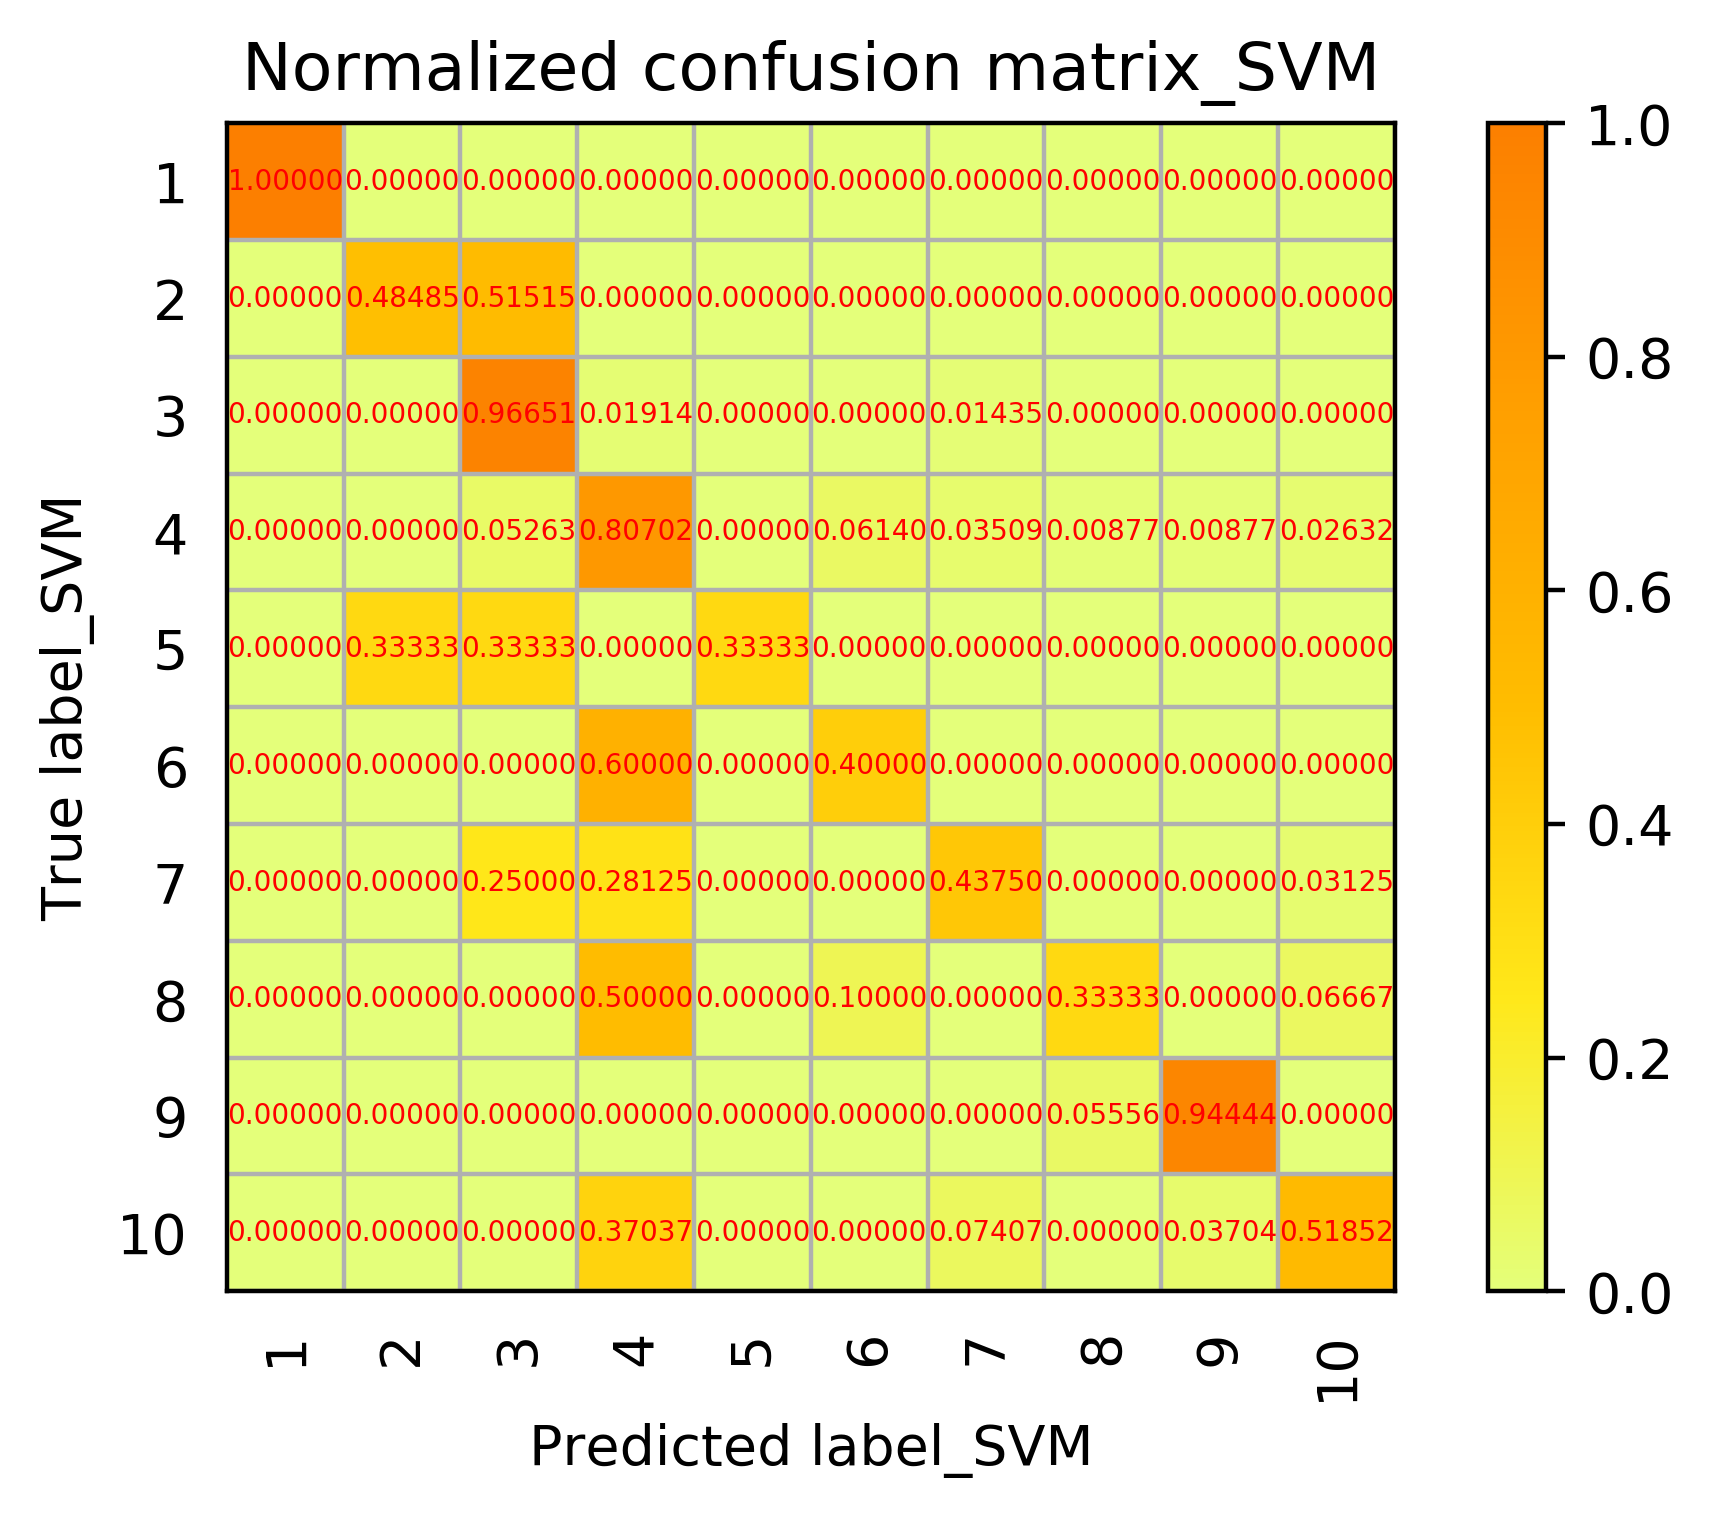

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
labels = ['1', '2', '3','4','5','6','7','8','9','10']
tick_marks = np.array(range(len(labels))) + 0.5
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label_SVM')
    plt.xlabel('Predicted label_SVM')
cm = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=3)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)
plt.figure(figsize=(6, 4), dpi=400)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c >= 0.0:
        plt.text(x_val, y_val, "%0.5f" % (c,), color='red', fontsize=5, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix_SVM')
# show confusion matrix
plt.savefig('../Data/confusion_matrix_SVM.png', format='png')
plt.show()